# Como a temperatura da água afeta a pesca

De um modo geral, pode-se descrever os efeitos deletérios da temperatura nos peixes em função de temperaturas predominante altas ou baixas e do choque térmico:

<br>

*   Altas temperaturas: poucas espécies resistem a temperaturas elevadas (acima de 35ºC), pois estão, geralmente, associadas à diminuição nos teores de oxigênio dissolvido no meio e, ao mesmo tempo, ao aumento na taxa respiratória, além de afetar o metabolismo dos peixes, pois diminuem a afinidade da hemoglobina (pigmento do sangue) pelo oxigênio. Qualquer uma dessas condições, de um modo geral, irão resultar na morte dos peixes por asfixia.
<br>

*   Baixas temperaturas: baixas temperaturas também levam a maioria dos peixes a morte, sendo que esses organismos irão apresentar focos hemorrágicos. Baixas temperaturas também poderiam provocar o enfraquecimento dos organismos devido à diminuição da produção do muco protetor da pele, facilitando o ataque de parasitas, podendo inclusive levá-los à morte.
<br>

*   Choques térmicos: são consideradas variações bruscas de temperatura oscilações de, pelo menos, 3 a 4ºC num mesmo dia. Essas variações são extremamente estressantes para os peixes (levando-os geralmente à morte), sobretudo para peixes em estágios mais jovens (e, portanto, mais sensíveis), já que por serem organismos de sangue frio não têm a capacidade de regular a temperatura do corpo e necessitam de um tempo de adaptação quando há alterações na temperatura do ambiente.<br>




# **Dicionário**<br>




*   Ponto de orvalho - designa a temperatura na qual o vapor de água presente no ar ambiente passa ao estado líquido na forma de pequenas gotas.
*   Temperatura do ar (graus celsius)
*   Temperatura Max - temperatura máxima da água
*  Temperatura Min. - temperatura mínima da água
*   Ano
*   Mês
*   Dia
*   Município - cidade em que houve a coleta dos dados de pesca
*   Tipo - tipo de pesca
*   Espécie - espécie de pescado
*   Produção estimada - quantidade de pesca

# Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')

# Carregando o banco de dados

In [2]:
df_temperatura=pd.read_csv('temperatura_ilha.csv')
print(df_temperatura.shape)
df_temperatura.head()

(3177, 4)


,Data,TEMP DO AR (º),TEMP MAX (ºC),TEMP MIN (ºC)
0,2023-10-31,2700.0,NaN,2200.0
1,2023-10-30,2300.0,NaN,1800.0
2,2023-10-30,2400.0,3100.0,NaN
3,2023-10-29,2700.0,NaN,2000.0
4,2023-10-29,2600.0,2800.0,NaN


In [3]:
#Excluindo valores em que não tem DATA
df_temperatura[df_temperatura['Data'].isnull()]
empty_indices = df_temperatura[df_temperatura['Data'].isnull()].index.tolist()
df_temperatura2=df_temperatura.drop(empty_indices)


#Deixando na Escala Normal

colunas_numericas_tmp=['TEMP DO AR (º)','TEMP MAX (ºC)','TEMP MIN (ºC)']
df_temperatura2[colunas_numericas_tmp]=df_temperatura2[colunas_numericas_tmp].apply(lambda x: x / 100)
df_temperatura2.head()


print(df_temperatura2.shape)
df_temperatura2

(3159, 4)


,Data,TEMP DO AR (º),TEMP MAX (ºC),TEMP MIN (ºC)
0,2023-10-31,27.0,NaN,22.0
1,2023-10-30,23.0,NaN,18.0
2,2023-10-30,24.0,31.0,NaN
3,2023-10-29,27.0,NaN,20.0
4,2023-10-29,26.0,28.0,NaN
...,...,...,...,...
3168,2017-04-10,22.0,22.0,NaN
3169,2017-01-10,26.0,NaN,19.0
3170,2017-02-10,21.0,27.0,NaN
3171,2017-02-10,31.0,NaN,19.0


# Grafico TEMP MIN X DATA

In [4]:
df_tempmin=df_temperatura2.drop(['TEMP MAX (ºC)','TEMP DO AR (º)'],axis=1).dropna()
df_tempmin = df_tempmin.groupby('Data')['TEMP MIN (ºC)'].min().reset_index()
print(df_tempmin.shape)
df_tempmin

(1533, 2)


,Data,TEMP MIN (ºC)
0,2017-01-10,19.0
1,2017-02-10,19.0
2,2017-04-10,18.0
3,2017-05-10,22.0
4,2017-06-10,22.0
...,...,...
1528,2023-10-27,18.0
1529,2023-10-28,21.0
1530,2023-10-29,20.0
1531,2023-10-30,18.0


In [5]:
df_tempmin.describe()

,TEMP MIN (ºC)
count,1533.000000
mean,21.210046
std,2.488538
min,13.000000
25%,19.000000
50%,21.000000
75%,23.000000
max,32.000000


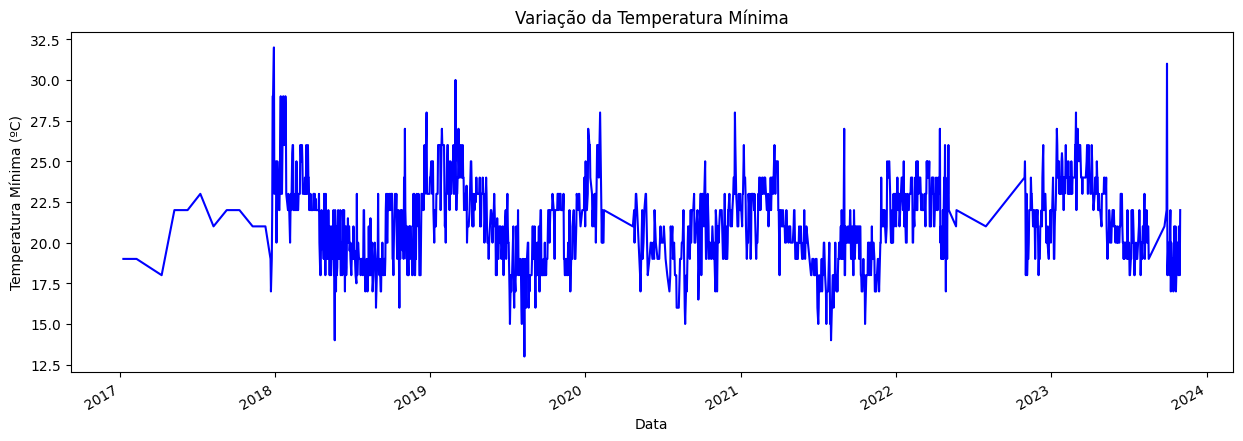

In [6]:
# Plotando os dados de treino e teste
df_tempmin['Data'] = pd.to_datetime(df_tempmin['Data'])
plt.figure(figsize=(15, 5))  # Tamanho reduzido para melhor visualização
plt.plot(df_tempmin['Data'], df_tempmin['TEMP MIN (ºC)'], color='b')  # Plotando treino
plt.xlabel('Data')
plt.ylabel('Temperatura Mínima (ºC)')
plt.title('Variação da Temperatura Mínima')

# Configurando os ticks do eixo x para que eles representem apenas os anos presentes nos dados
years = mdates.YearLocator()  # Localizador de anos
years_fmt = mdates.DateFormatter('%Y')  # Formatador para mostrar apenas o ano
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(years_fmt)

# Melhorar a apresentação dos ticks do eixo x para evitar sobreposição
plt.gcf().autofmt_xdate()

plt.show()

# Grafico TEMP DO AR  X DATA

In [7]:
df_tempar=df_temperatura2.drop(['TEMP MAX (ºC)','TEMP MIN (ºC)'],axis=1).dropna()
df_tempar = df_tempar.groupby('Data')['TEMP DO AR (º)'].max().reset_index()
print(df_tempar.shape)
df_tempar

(1783, 2)


,Data,TEMP DO AR (º)
0,2017-01-10,26.0
1,2017-02-10,31.0
2,2017-03-10,25.0
3,2017-04-10,22.0
4,2017-05-10,23.0
...,...,...
1778,2023-10-27,22.0
1779,2023-10-28,24.0
1780,2023-10-29,27.0
1781,2023-10-30,24.0


In [8]:
df_tempar.describe()

,TEMP DO AR (º)
count,1783.000000
mean,24.412675
std,2.659772
min,16.000000
25%,23.000000
50%,24.000000
75%,26.000000
max,33.000000


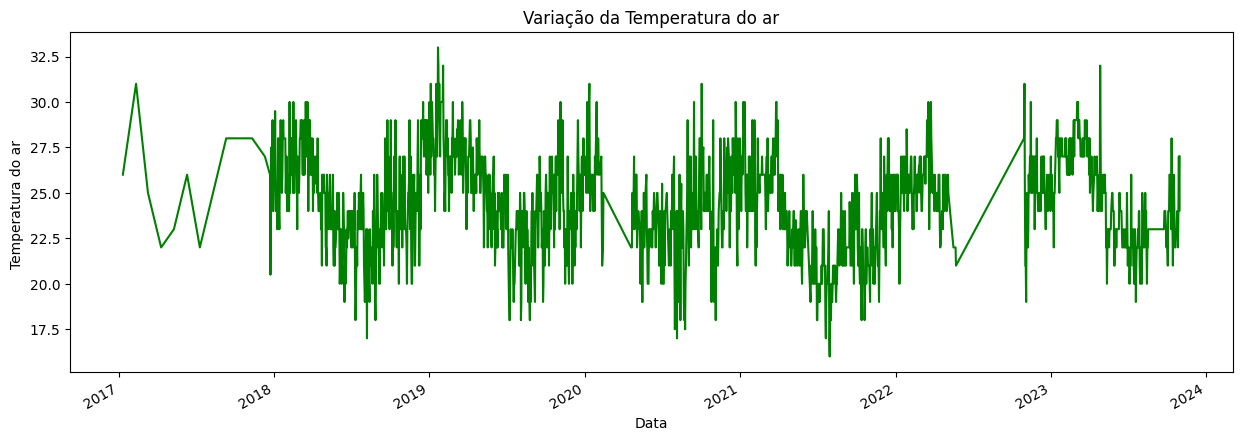

In [9]:
# Plotando os dados de treino e teste
df_tempar['Data'] = pd.to_datetime(df_tempar['Data'])
plt.figure(figsize=(15, 5))  # Tamanho reduzido para melhor visualização
plt.plot(df_tempar['Data'], df_tempar['TEMP DO AR (º)'], color='g')  # Plotando treino
plt.xlabel('Data')
plt.ylabel('Temperatura do ar ')
plt.title('Variação da Temperatura do ar')

# Configurando os ticks do eixo x para que eles representem apenas os anos presentes nos dados
years = mdates.YearLocator()  # Localizador de anos
years_fmt = mdates.DateFormatter('%Y')  # Formatador para mostrar apenas o ano
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(years_fmt)

# Melhorar a apresentação dos ticks do eixo x para evitar sobreposição
plt.gcf().autofmt_xdate()

plt.show()

# Modelo ARIMA para TEMP MAX

Como so vamos usar o "temp max" eu retirei as duplicatas (duas ou mais medições diarias) e coloquei o valor maximo de cada dia!

In [10]:
df_tempmax=df_temperatura2.drop(['TEMP DO AR (º)','TEMP MIN (ºC)'],axis=1).dropna()
df_tempmax = df_tempmax.groupby('Data')['TEMP MAX (ºC)'].max().reset_index()
print(df_tempmax.describe())
df_tempmax


       TEMP MAX (ºC)
count    1499.000000
mean       27.914610
std         3.604817
min        17.000000
25%        25.000000
50%        28.000000
75%        31.000000
max        41.000000


,Data,TEMP MAX (ºC)
0,2017-01-10,24.0
1,2017-02-10,27.0
2,2017-03-10,33.0
3,2017-04-10,22.0
4,2017-05-10,22.0
...,...,...
1494,2023-10-26,26.0
1495,2023-10-27,25.0
1496,2023-10-28,17.0
1497,2023-10-29,28.0


In [11]:
df_tempmax.describe()[1:]

,TEMP MAX (ºC)
mean,27.914610
std,3.604817
min,17.000000
25%,25.000000
50%,28.000000
75%,31.000000
max,41.000000


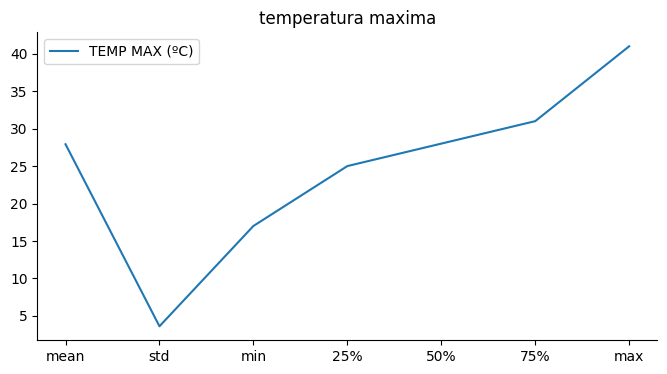

In [12]:
df_tempmax.describe()[1:].plot(kind='line',figsize=(8,4),title='temperatura maxima')
plt.gca().spines[['top','right']].set_visible(False)


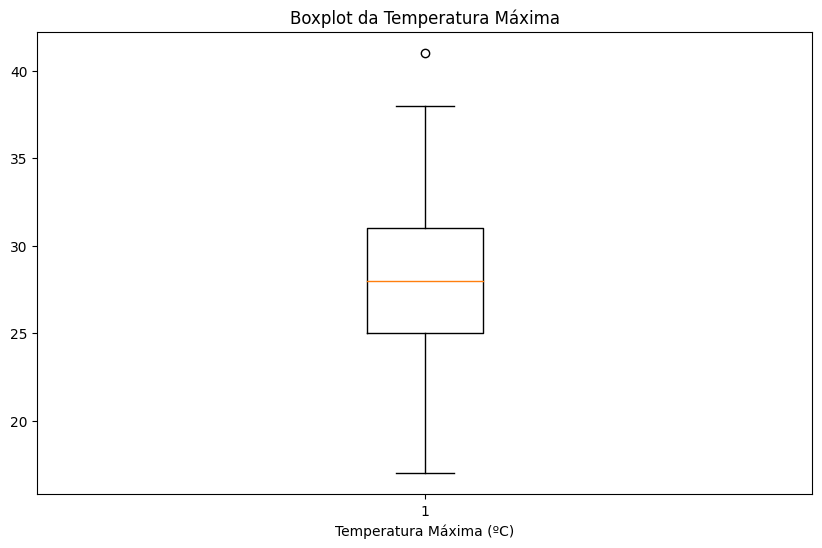

In [13]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_tempmax['TEMP MAX (ºC)'])
plt.title('Boxplot da Temperatura Máxima')
plt.xlabel('Temperatura Máxima (ºC)')
plt.show()

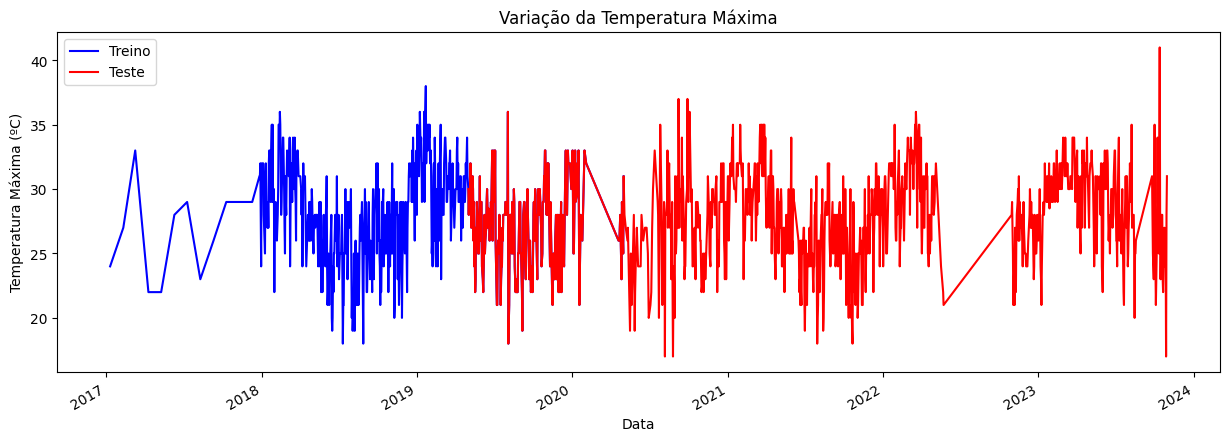

In [14]:


# Certifique-se de que 'Data' é um tipo datetime
df_tempmax['Data'] = pd.to_datetime(df_tempmax['Data'])

# Filtrando os dados conforme as datas fornecidas para treino e teste
temp_treino = df_tempmax[df_tempmax['Data'] <= '2020-05-01']
temp_teste = df_tempmax[df_tempmax['Data'] > '2019-05-01']

# Plotando os dados de treino e teste
plt.figure(figsize=(15, 5))  # Tamanho reduzido para melhor visualização
plt.plot(temp_treino['Data'], temp_treino['TEMP MAX (ºC)'], color='b')  # Plotando treino
plt.plot(temp_teste['Data'], temp_teste['TEMP MAX (ºC)'], color='r')  # Plotando teste
plt.legend(['Treino', 'Teste'])
plt.xlabel('Data')
plt.ylabel('Temperatura Máxima (ºC)')
plt.title('Variação da Temperatura Máxima')

# Configurando os ticks do eixo x para que eles representem apenas os anos presentes nos dados
years = mdates.YearLocator()  # Localizador de anos
years_fmt = mdates.DateFormatter('%Y')  # Formatador para mostrar apenas o ano
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(years_fmt)

# Melhorar a apresentação dos ticks do eixo x para evitar sobreposição
plt.gcf().autofmt_xdate()

plt.show()

# Histogramas 

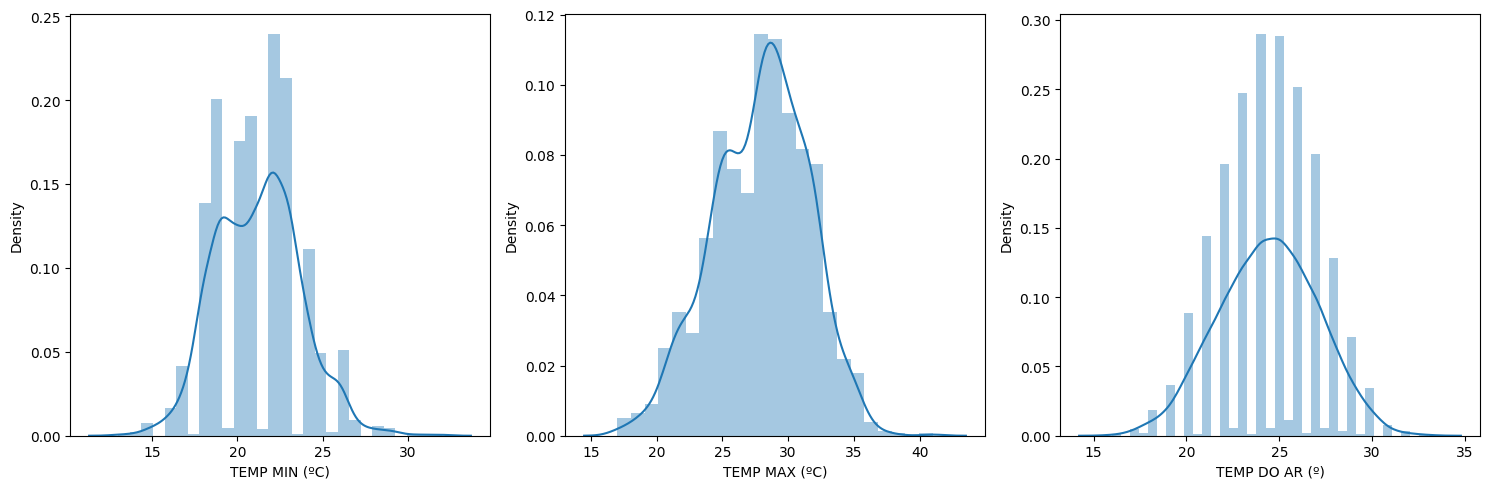

In [15]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
lista=[df_tempmin["TEMP MIN (ºC)"],df_tempmax["TEMP MAX (ºC)"],df_tempar["TEMP DO AR (º)"]]

j=0
for i in lista:
    sns.distplot(a=i,hist=True,kde=True,rug=False,ax=axes[j])
    
    j+=1
# Ajustar o layout para evitar sobreposições
plt.tight_layout()

# Mostrar o gráfico
plt.show()


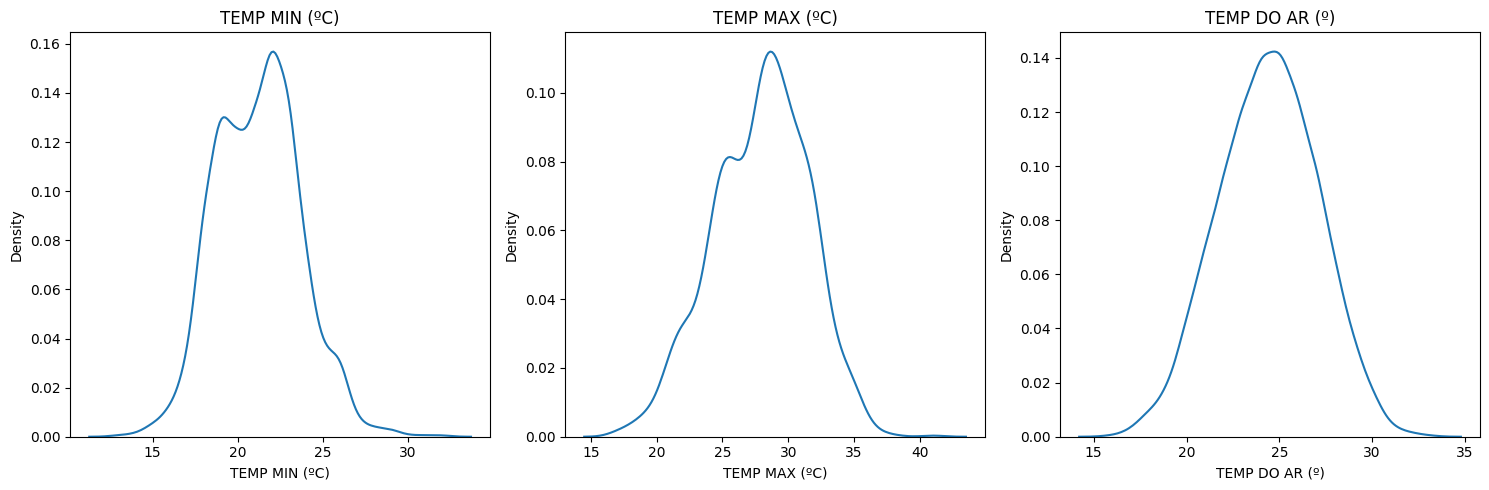

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
j = 0
for i in lista:
    sns.kdeplot(data=i, ax=axes[j])  # Corrigir para passar os dados diretamente
    axes[j].set_title(i.name)
    j += 1

# Ajustar o layout para evitar sobreposições
plt.tight_layout()
# Mostrar o gráfico
plt.show()

tem menos dados entre 2017 - 2018 , isso justifica ser menos "agressivo" no começo 

In [17]:

# Importando o módulo
from pmdarima.arima import auto_arima

# Instanciando e aplicando aos dados

auto_tmax= auto_arima(temp_treino['TEMP MAX (ºC)'], #Dados
                         max_p=10, # Grau máximo de teste do módulo AR,
                         max_d=10, # Grau máximo de teste de diferenciação (I)
                         max_q=10, # Grau máximo de teste do módulo MA
                         trace=True # Para imprimir os resultados dos testes
                         )




Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3233.761, Time=1.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3520.463, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3283.054, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3359.815, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6173.202, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3228.637, Time=1.05 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=3320.228, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3243.840, Time=1.23 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=3230.401, Time=1.53 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=3303.206, Time=0.26 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3231.170, Time=1.23 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=3229.348, Time=1.70 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3241.218, Time=0.29 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 9.197 seconds


In [18]:
from statsmodels.tsa.arima.model import ARIMA
arima_tmax = ARIMA(endog= temp_treino['TEMP MAX (ºC)'],order=(1,0,0)).fit()

# ARIMA
temp_treino['prev_tmax'] = arima_tmax.predict()
temp_teste['prev_tmax'] = arima_tmax.predict(start=temp_treino.index.max(),end=temp_teste.index.max())


In [19]:
print(temp_treino['prev_tmax'])

0      27.854926
1      25.712650
2      27.379823
3      30.714168
4      24.601201
         ...    
644    26.824098
645    27.935547
646    25.156925
647    28.491271
648    26.268374
Name: prev_tmax, Length: 649, dtype: float64


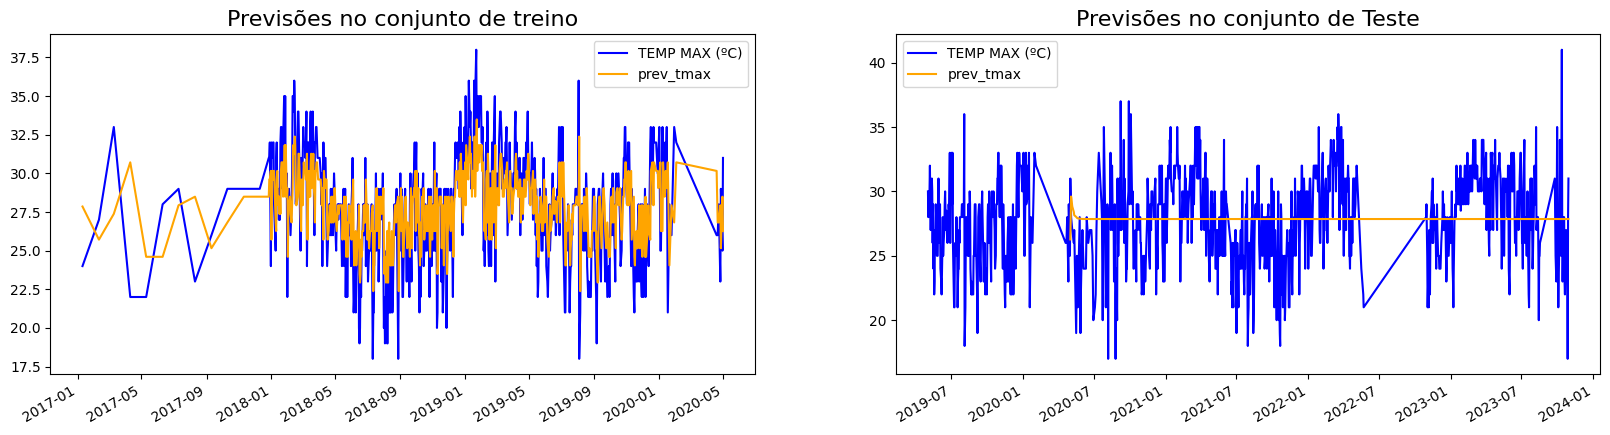

In [20]:
# Construindo gráficos para as previsões no treino e no teste
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Plotando treino
ax[0].plot(temp_treino['Data'], temp_treino['TEMP MAX (ºC)'], label='TEMP MAX (ºC)', color='blue')
ax[0].plot(temp_treino['Data'], temp_treino['prev_tmax'], label='prev_tmax', color='orange')
ax[0].set_title('Previsões no conjunto de treino', size=16)

# Plotando teste
ax[1].plot(temp_teste['Data'], temp_teste['TEMP MAX (ºC)'], label='TEMP MAX (ºC)', color='blue')
ax[1].plot(temp_teste['Data'], temp_teste['prev_tmax'], label='prev_tmax', color='orange')
ax[1].set_title('Previsões no conjunto de Teste', size=16)

# Configurando as legendas
ax[0].legend()
ax[1].legend()

# Melhorar a apresentação dos ticks do eixo x para evitar sobreposição
plt.gcf().autofmt_xdate()

plt.show()

# Series Temporais dados de Pesca

In [21]:
df_pesca=pd.read_csv('pescado_nov.csv')
print(df_pesca.shape)
df_pesca.head()

(7437, 6)


,Ano,Mês,Município,Pescado,Tipo de Pesca,valor estimado no período
0,2017,1,Santos/Guarujá,Abrótea,Industrial,"R$ 785,10"
1,2017,1,Santos/Guarujá,Anequim,Industrial,"R$ 15.000,00"
2,2017,1,Santos/Guarujá,Atuns agrupados,Industrial,"R$ 1.170,00"
3,2017,1,Santos/Guarujá,Bagre,Industrial,"R$ 1.128,00"
4,2017,1,Santos/Guarujá,Bagre-amarelo,Artesanal,"R$ 38,00"


In [22]:
df_pesca.drop(['Pescado','Município'],axis=1,inplace=True)

def monetario_para_float(valor_monetario):
    try:
        # Remove caracteres não numéricos
        valor_limpo = valor_monetario.replace('R$ ', '').replace('.', '').replace(',', '.').strip()
        # Converte para float
        valor_float = float(valor_limpo)
        return valor_float
    except ValueError:
        return None  # Retorne None se houver um erro na conversão

# Aplicar a função à coluna 'valor estimado no período' do DataFrame 'pescado'
df_pesca['valor estimado no período'] = df_pesca['valor estimado no período'].apply(monetario_para_float)

# Imprimir o DataFrame com os valores convertidos
df_pesca

,Ano,Mês,Tipo de Pesca,valor estimado no período
0,2017,1,Industrial,785.1
1,2017,1,Industrial,15000.0
2,2017,1,Industrial,1170.0
3,2017,1,Industrial,1128.0
4,2017,1,Artesanal,38.0
...,...,...,...,...
7432,2023,8,Industrial,35000.0
7433,2023,8,Industrial,5532.0
7434,2023,8,Industrial,14465.2
7435,2023,8,Industrial,300.0


In [23]:
# Adding a new column 'Data' by joining 'Ano' and 'Mês'
df_pesca['Data'] = df_pesca['Ano'].astype(str) + '-' + df_pesca['Mês'].astype(str).str.zfill(2)

# Grouping by 'Data' and 'Tipo de Pesca'
grouped_df = df_pesca.groupby(['Data', 'Tipo de Pesca']).sum().reset_index()

grouped_df.drop(['Ano','Mês'],inplace=True,axis=1)

print(grouped_df.shape)
grouped_df

(160, 3)


,Data,Tipo de Pesca,valor estimado no período
0,2017-01,Artesanal,522674.89
1,2017-01,Industrial,2030318.30
2,2017-02,Artesanal,868965.14
3,2017-02,Industrial,2520159.01
4,2017-03,Artesanal,129110.17
...,...,...,...
155,2023-06,Industrial,4301366.10
156,2023-07,Artesanal,999803.84
157,2023-07,Industrial,10500813.30
158,2023-08,Artesanal,800656.96


In [24]:
from statsmodels.tsa.stattools import adfuller

# Convertendo 'Data' para datetime e definindo como índice
grouped_df['Data'] = pd.to_datetime(grouped_df['Data'])
grouped_df.set_index('Data', inplace=True)

# Separando os dados em dois DataFrames, um para cada tipo de pesca
df_artesanal = grouped_df[grouped_df['Tipo de Pesca'] == 'Artesanal'].drop('Tipo de Pesca', axis=1)
df_industrial = grouped_df[grouped_df['Tipo de Pesca'] == 'Industrial'].drop('Tipo de Pesca', axis=1)



In [25]:
# Verificando estacionariedade (usando o teste Dickey-Fuller aumentado)
def test_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    return p_value

p_value_artesanal = test_stationarity(df_artesanal['valor estimado no período'])
p_value_industrial = test_stationarity(df_industrial['valor estimado no período'])

print(p_value_artesanal,p_value_industrial)

0.46707746774836384 5.909353399655543e-13


In [26]:
from sklearn.model_selection import train_test_split

train_artesanal, test_artesanal = train_test_split(df_artesanal, test_size=0.2, shuffle=False)
train_industrial, test_industrial = train_test_split(df_industrial, test_size=0.2, shuffle=False)

(train_artesanal, test_artesanal, train_industrial, test_industrial)

(            valor estimado no período
 Data                                 
 2017-01-01                  522674.89
 2017-02-01                  868965.14
 2017-03-01                  129110.17
 2017-04-01                   96445.51
 2017-05-01                   67501.00
 ...                               ...
 2021-12-01                  628511.00
 2022-01-01                  611377.00
 2022-02-01                  553822.00
 2022-03-01                   12826.00
 2022-04-01                   15860.00
 
 [64 rows x 1 columns],
             valor estimado no período
 Data                                 
 2022-05-01                   10089.00
 2022-06-01                 1779756.20
 2022-07-01                 1129093.45
 2022-08-01                  994251.24
 2022-09-01                  569919.79
 2022-10-01                 1488948.80
 2022-11-01                 1228714.26
 2022-12-01                  950010.71
 2023-01-01                 1274190.98
 2023-02-01                  280085.52

ChatGPT
Para encontrar os melhores valores dos parâmetros p, d e q para os modelos ARIMA das suas séries temporais – uma para a pesca artesanal e outra para a pesca industrial (após diferenciação) – podemos usar a função auto_arima da biblioteca pmdarima. Esta função automatiza o processo de seleção de modelos ARIMA, testando diferentes combinações de p, d e q e escolhendo a que melhor se adequa aos dados com base em um critério de informação, como o AIC (Critério de Informação de Akaike).

In [27]:
# Ajustando o modelo ARIMA para pesca industrial com diferenciação
# Diferenciando a série para torná-la estacionária
df_artesanal_diff = df_artesanal.diff().dropna()


# Encontrando os melhores parâmetros para o modelo ARIMA da pesca industrial
auto_model_industrial = auto_arima(df_industrial['valor estimado no período'], 
                                  seasonal=False, 
                                  trace=True,
                                  error_action='ignore', 
                                  suppress_warnings=True)

# Encontrando os melhores parâmetros para o modelo ARIMA da pesca artesanal (diferenciada)
auto_model_artesanal = auto_arima(df_artesanal_diff['valor estimado no período'], 
                                   seasonal=False, 
                                   trace=True,
                                   error_action='ignore', 
                                   suppress_warnings=True)

# Melhores parâmetros encontrados para cada tipo de pesca
best_fit_artesanal = auto_model_artesanal.order
best_fit_industrial = auto_model_industrial.order

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2613.720, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2715.225, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2641.734, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2689.484, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2612.479, Time=0.17 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2680.651, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2610.853, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2612.289, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2624.298, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2603.945, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2602.110, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2600.362, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2601.970, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.849 seconds
Performing stepwise se

In [28]:
# Para a pesca artesanal
model_artesanal = ARIMA(df_artesanal_diff['valor estimado no período'], order=best_fit_artesanal)
results_artesanal = model_artesanal.fit()
summary_artesanal = results_artesanal.summary()
print(summary_artesanal)
print('-'*100)
print('-'*100)
print('-'*100)
# Para a pesca industrial (diferenciada)
model_industrial = ARIMA(df_industrial['valor estimado no período'], order=best_fit_industrial)
results_industrial = model_industrial.fit()
summary_industrial = results_industrial.summary()
print(summary_industrial)


                                   SARIMAX Results                                   
Dep. Variable:     valor estimado no período   No. Observations:                   79
Model:                        ARIMA(1, 0, 1)   Log Likelihood               -1174.781
Date:                       Thu, 16 Nov 2023   AIC                           2357.562
Time:                               01:32:37   BIC                           2367.040
Sample:                           02-01-2017   HQIC                          2361.359
                                - 08-01-2023                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3518.7595   1.45e+04      0.243      0.808   -2.48e+04    3.19e+04
ar.L1          0.3347      0.200      1.678      0.093      -0.056       0.

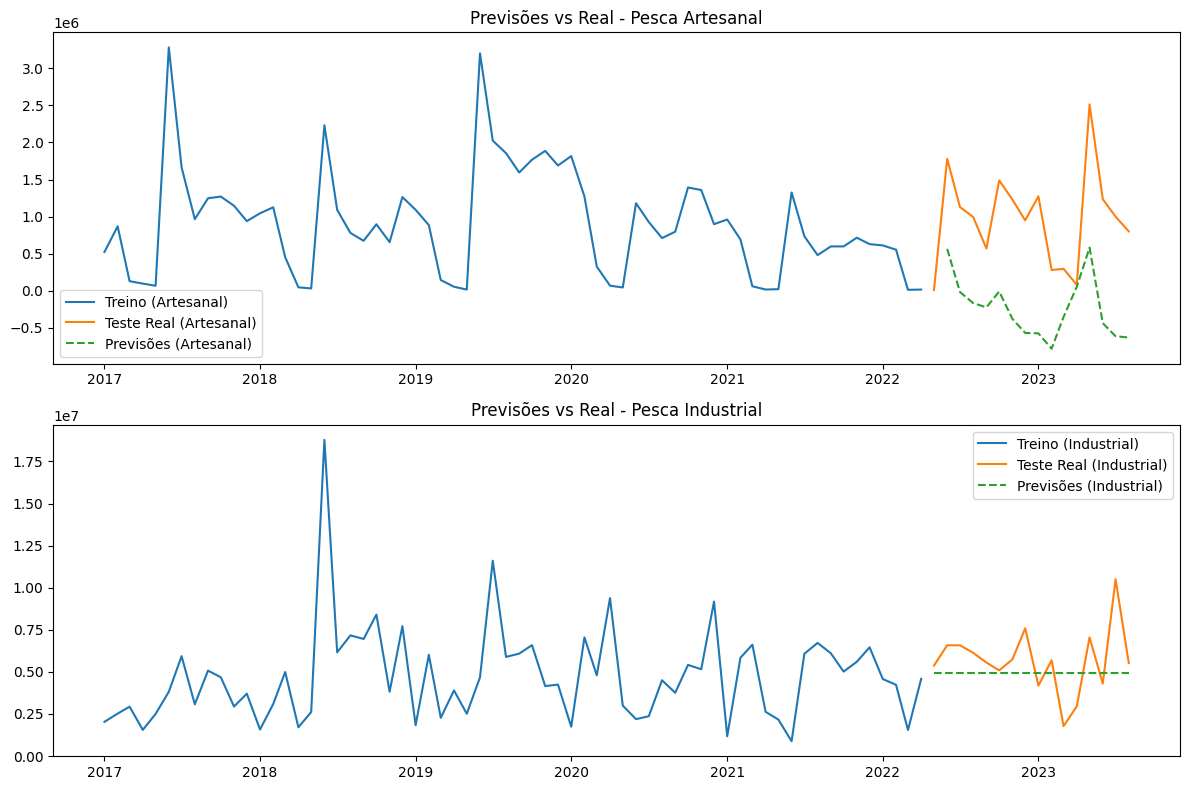

In [29]:
# Fazendo previsões para o intervalo de teste
start_artesanal = test_artesanal.index[1] # Começando do segundo ponto devido à diferenciação
end_artesanal = test_artesanal.index[-1]

start_industrial = test_industrial.index[0]  
end_industrial = test_industrial.index[-1]

predictions_artesanal_diff = results_artesanal.predict(start=start_artesanal, end=end_artesanal)
predictions_industrial = results_industrial.predict(start=start_industrial, end=end_industrial)

# Revertendo a diferenciação para previsões industriais
last_train_value = train_artesanal['valor estimado no período'].iloc[-1]
predictions_artesanal = last_train_value + predictions_artesanal_diff.cumsum()

# Plotando os gráficos de comparação
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

# Pesca Artesanal
axes[0].plot(train_artesanal['valor estimado no período'], label='Treino (Artesanal)')
axes[0].plot(test_artesanal['valor estimado no período'], label='Teste Real (Artesanal)')
axes[0].plot(predictions_artesanal, label='Previsões (Artesanal)', linestyle='--')
axes[0].set_title('Previsões vs Real - Pesca Artesanal')
axes[0].legend()

# Pesca Artesanal
axes[1].plot(train_industrial['valor estimado no período'], label='Treino (Industrial)')
axes[1].plot(test_industrial['valor estimado no período'], label='Teste Real (Industrial)')
axes[1].plot(predictions_industrial, label='Previsões (Industrial)', linestyle='--')
axes[1].set_title('Previsões vs Real - Pesca Industrial')
axes[1].legend()



plt.tight_layout()
plt.show()

# Histogramas Pesca Industrial e Pesca Artesanal

In [30]:
df_artesanal.reset_index(inplace=True)
df_industrial.reset_index(inplace=True)

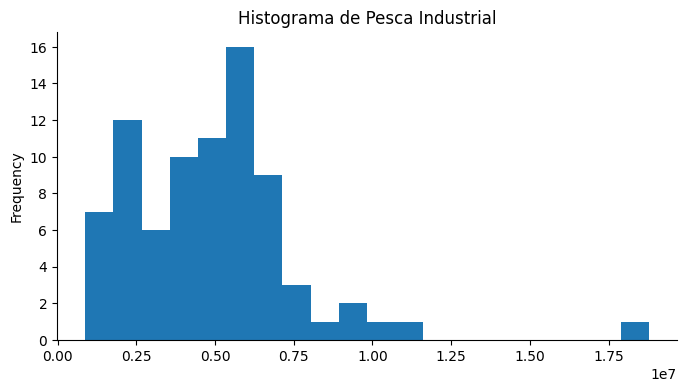

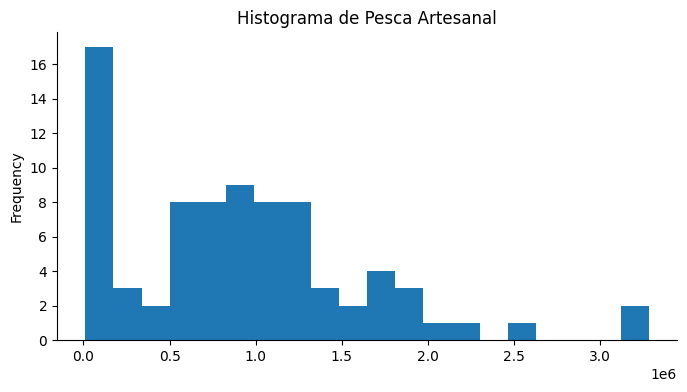

In [31]:
# Lista de DataFrames
dataframes = [df_industrial, df_artesanal]

# Configurações para remover as linhas superior e direita
def remove_spines():
    plt.gca().spines[['top', 'right']].set_visible(False)

# Loop para plotar os histogramas
x=['Pesca Industrial','Pesca Artesanal']
j=0
for i, df in enumerate(dataframes, start=1):
    plt.figure(figsize=(8, 4))  # Ajuste o tamanho da figura conforme necessário
    df['valor estimado no período'].plot(kind='hist', bins=20, title=f'Histograma de {x[j]}')
    remove_spines()
    plt.show()
    j+=1